# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [18]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [19]:
X.shape

(178, 13)

In [20]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int64

## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

This algorithm divides our data into K clusters by looking for centroids and calculating distances.

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
km = KMeans(n_clusters=8)
km.fit(X)

KMeans()

In [24]:
y_pred = km.predict(X)
y_pred

array([4, 4, 0, 6, 5, 6, 0, 0, 4, 4, 6, 0, 0, 4, 6, 0, 0, 4, 6, 2, 5, 5,
       4, 4, 2, 2, 0, 0, 2, 4, 0, 6, 4, 0, 4, 2, 2, 4, 4, 5, 2, 4, 4, 5,
       2, 4, 4, 4, 4, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 7, 5, 7, 1, 3, 3, 5,
       7, 7, 5, 5, 2, 3, 7, 4, 2, 3, 3, 7, 5, 7, 3, 5, 1, 7, 7, 7, 7, 1,
       5, 1, 7, 7, 7, 3, 3, 2, 1, 3, 5, 3, 5, 1, 7, 3, 5, 3, 7, 7, 3, 5,
       1, 3, 1, 7, 3, 3, 7, 3, 3, 1, 1, 7, 3, 3, 3, 3, 3, 7, 3, 1, 1, 7,
       1, 1, 1, 5, 5, 7, 1, 1, 1, 5, 7, 1, 2, 2, 3, 1, 1, 1, 7, 7, 3, 5,
       1, 5, 7, 2, 5, 1, 7, 5, 1, 5, 1, 7, 5, 5, 5, 1, 7, 7, 5, 5, 5, 2,
       2, 1], dtype=int32)

Silhouette score is a metric of the separation of clusters

It ranges from -1 to 1, where negative values mean clusters are wrongly asigned, 0 means clusters overlap and 1 means clusters are separated and defined.

In [25]:
silhouette_score(X, y_pred)

0.5406824747857625

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [26]:
km5 = KMeans(n_clusters=5)
km5.fit(X)

KMeans(n_clusters=5)

In [27]:
y_pred5 = km5.predict(X)
y_pred5

array([1, 1, 1, 3, 4, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 4, 4, 4,
       1, 1, 4, 4, 1, 3, 4, 1, 3, 3, 1, 3, 1, 4, 4, 1, 1, 4, 4, 1, 1, 2,
       4, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 4, 2, 4, 0, 0, 1, 4, 0, 0, 0, 4, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 4, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 4, 0, 2, 4, 4, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 4, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 4, 2, 0, 0, 2, 4, 4, 4,
       4, 2], dtype=int32)

In [28]:
silhouette_score(X, y_pred5)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [29]:
km3 = KMeans(n_clusters=3)
km3.fit(X)

KMeans(n_clusters=3)

In [30]:
y_pred3 = km3.predict(X)
y_pred3

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [31]:
silhouette_score(X, y_pred3)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

In [32]:
from yellowbrick.cluster import KElbowVisualizer

The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for 𝐾
K
. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

In [33]:
kmeans = [KMeans(n_clusters=i) for i in range(1,11)]
for model in kmeans:
    model.fit(X)

In [34]:
inertias = [model.inertia_ for model in kmeans]
inertias[:3]

[17592296.383508474, 4543749.614531863, 2370689.6867829696]

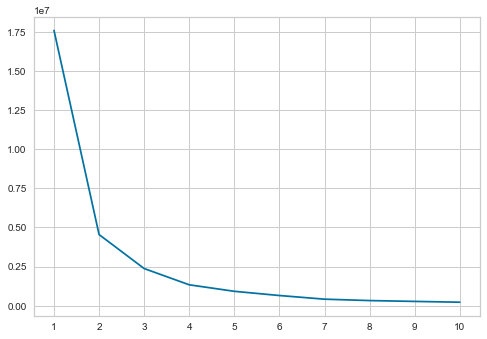

In [35]:
plt.plot(range(1,11),inertias)
plt.xticks(range(1,11));

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


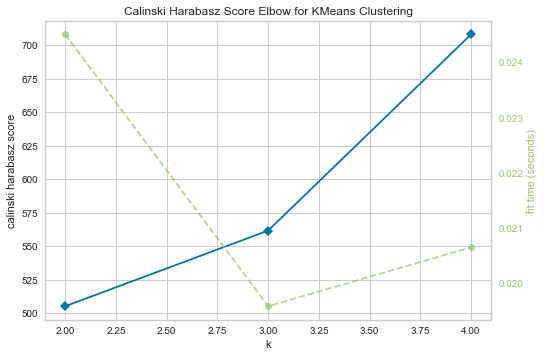

In [36]:
model_1 =  KMeans()
graph = KElbowVisualizer(model_1, metric='calinski_harabasz',k= (2,5))
graph.fit(X)
graph.poof();

***distortion:*** mean sum of squared distances to centers

***silhouette:*** mean ratio of intra-cluster and nearest-cluster distance

***calinski_harabaz:*** ratio of within to between cluster dispersion

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

In [43]:
from sklearn.cluster import AgglomerativeClustering

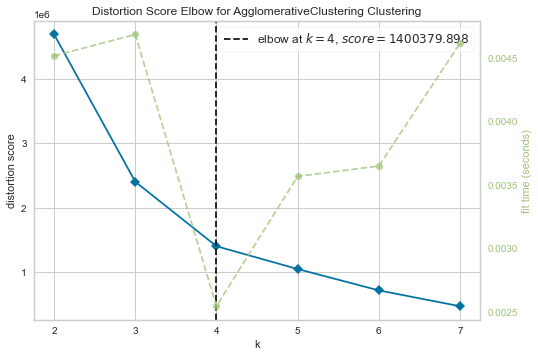

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
# By default metric = " distorsion"
agg = AgglomerativeClustering()
visualizer =  KElbowVisualizer(agg,k=(2,8))
visualizer.fit(X)
visualizer.poof()

Personally, none of the 3 ways gives me clear information on what value to assign to K.

In each graph it shows a different

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [45]:
km4 = KMeans(n_clusters=3)
km4.fit(X)

KMeans(n_clusters=3)

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
dbscan = DBSCAN()

In [48]:
dbscan.fit(X)

DBSCAN()

In [49]:
clusters = dbscan.fit_predict(X)

In [ ]:
#sns.scatterplot(X["clusters"], hue=dbscan.labels_)

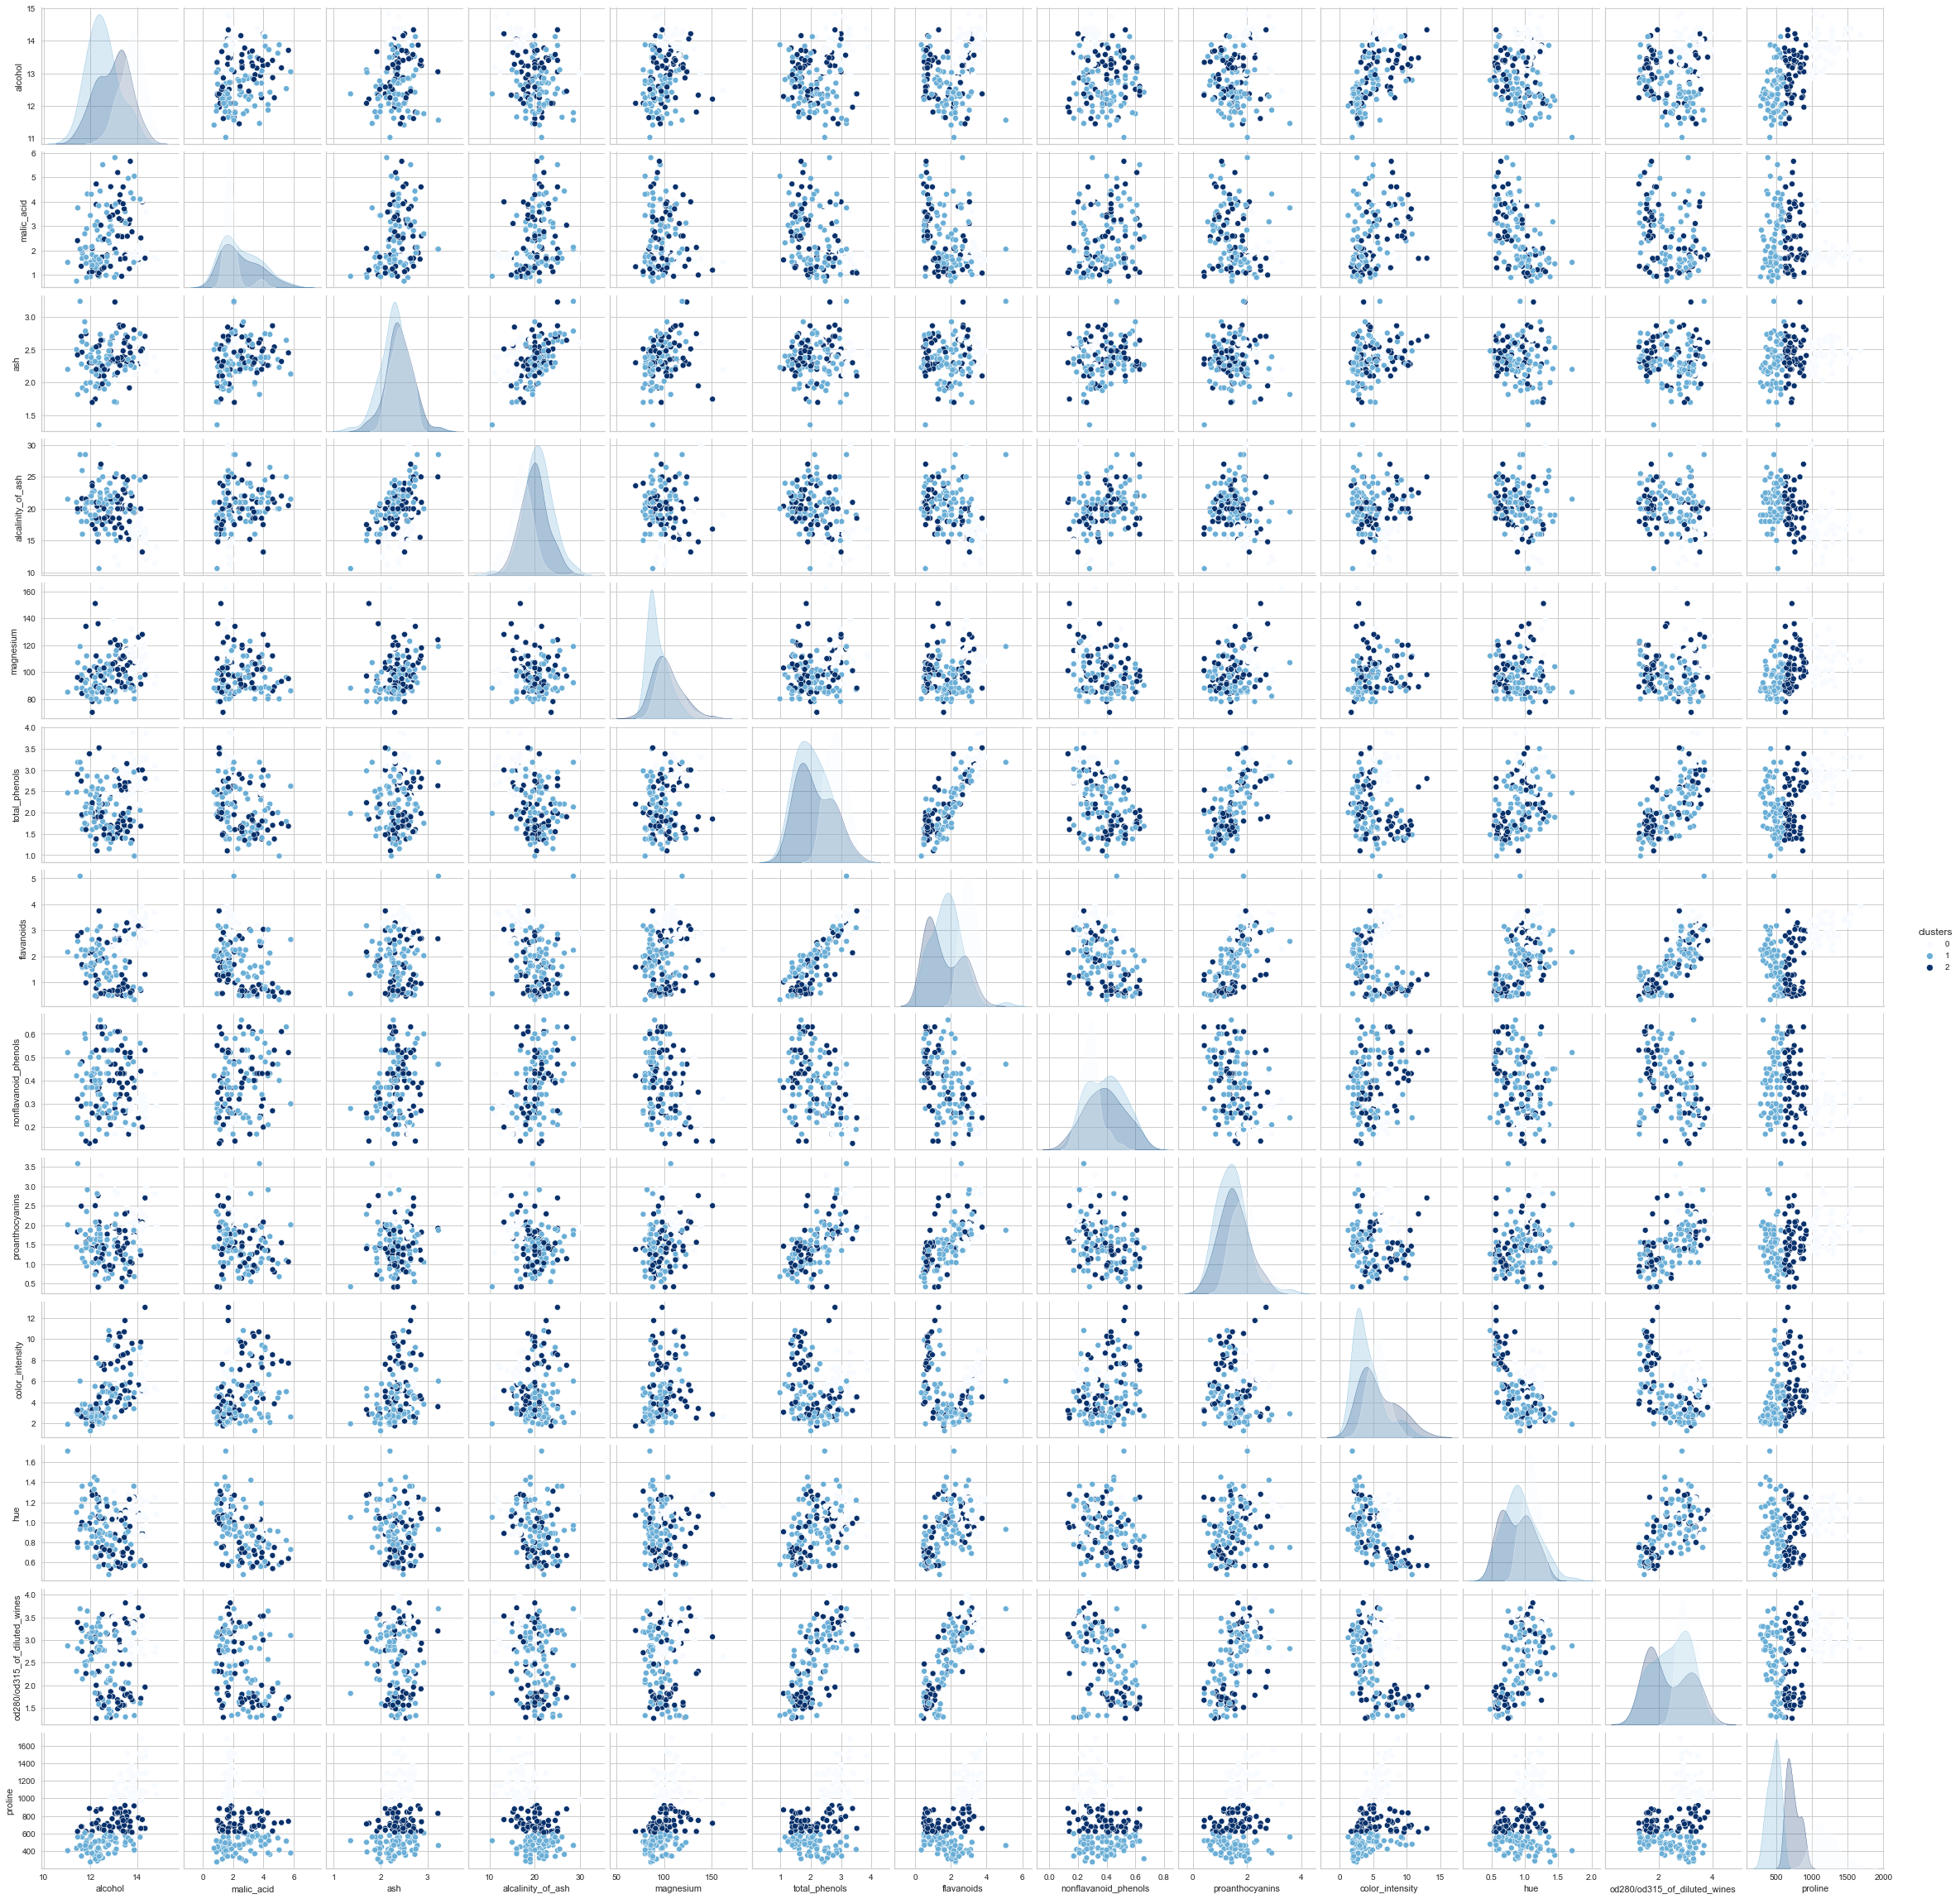

In [52]:
aggl = AgglomerativeClustering(n_clusters = 3).fit(X)
X["clusters"] = aggl.labels_
sns.pairplot(X, hue = "clusters", palette = "Blues")


## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

In [53]:
from sklearn.decomposition import PCA

In [54]:

#equis = pd.DataFrame(pca.fit_transform(X.drop(columns=["alcohol"])), columns=["1","2","3","4"])

In [55]:
pca = PCA(3)
df = pd.DataFrame(pca.fit_transform(X), columns = ["PC1", "PC2","PC3"])

In [56]:
df["clusters"] = aggl.labels_

In [57]:
df.head()

,PC1,PC2,PC3,clusters
0,318.564058,21.486392,3.155961,0
1,303.098512,-5.369838,6.837332,0
2,438.062117,-6.540998,-1.095534,0
3,733.240888,0.191741,-0.913226,0
4,-11.572611,18.496606,-0.575654,2


/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

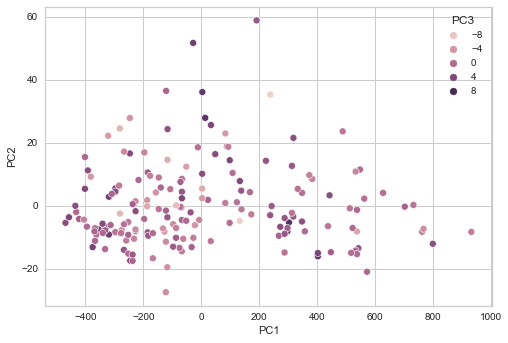

In [58]:
sns.scatterplot(df["PC1"],df["PC2"],df["PC3"], hue=df["clusters"])

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.

In [59]:
from sklearn.manifold import TSNE

In [68]:
ts = TSNE(n_components=2, perplexity=40, n_iter=1000, learning_rate=200)


In [69]:
tsn = pd.DataFrame(ts.fit_transform(X), columns=["TSNE1", "TSNE2"])

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TSNE1', ylabel='TSNE2'>

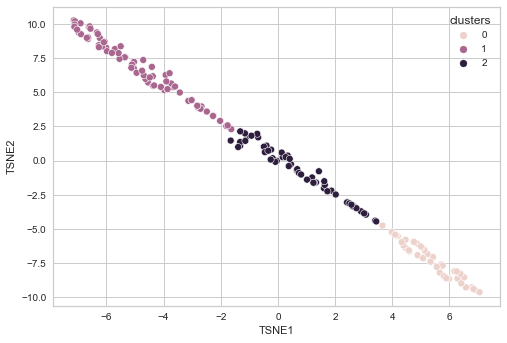

In [70]:
tsn["clusters"] = aggl.labels_
tsn.head()
sns.scatterplot(tsn["TSNE1"],tsn["TSNE2"], hue=tsn["clusters"])